#The Best Dataset HUB


https://code.datasciencedojo.com/datasciencedojo/datasets

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/transfusionData.csv')

# Show the first few rows of the dataset
print(data.head())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9e in position 11: invalid start byte

In [ ]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


#What is Encoding?
##Encoding is the process of converting data into a machine-readable format. Computers work with numbers, so when we have non-numeric data (like text or categories), we need to transform it into numbers for the computer to process.

For example:

* Imagine you have a dataset about animals, and one of the columns is "Animal Type" with values like Cat, Dog, and Rabbit.

* Computers cannot directly understand these words, so we need to encode them into numbers, like:

 * Cat → 1

 * Dog → 2

 * Rabbit → 3

This process of converting categorical (non-numeric) data into numeric form is called encoding.

#What is One-Hot Encoding?
##One-Hot Encoding is a specific type of encoding where each category in a column is represented as a separate binary column (a column with only 0s and 1s). Instead of assigning arbitrary numbers to categories, it creates a new column for each category and uses 1 to indicate the presence of that category and 0 otherwise.

Example:
Let’s say we have a column called Color with three unique values: Red, Blue, and Green.

Using one-hot encoding, we transform this into:

- Red	Blue	Green
- 1	 ->  0	->   0
- 0	   1	   0
- 0	   0	   1
- 1	   0	   0

---------------------------------------
Each row now has binary values (1 or 0) indicating which color it corresponds to.

For example, the first row (Red) has a 1 in the "Red" column and 0s in the other columns.

Example, in netflix data Gender and Subscription Plan can be categorical variables.

In [ ]:
# Encode the categorical column 'Species' using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Species'], drop_first=True)

In [ ]:
# Selecting features (e.g., Length1, Length2, Length3) and target variable (Weight)
X = data_encoded[['Length1', 'Length2', 'Length3']]
y = data_encoded['Weight']

In [ ]:
# Display summary statistics to understand the data better
data_encoded.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (127, 3)
Testing set size: (32, 3)


In [ ]:
# Declare the linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

When we create a regression model (like linear regression), we are essentially trying to find the mathematical equation that best describes the relationship between the input variables (features) and the target variable (output).

This equation is usually written as: y=β
0
 +β
1
 x
1
 +β
2
 x
2
 +⋯+β
n
 x
n

Where,
* y is predicted value
* x1, x2, .....xn (Input features i.e. independant variables)
* β0: The intercept of the model.
* β
1
,
β
2
,
…
,
β
n
β
1
 ,β
2
 ,…,β
n : The coefficients of the model.



##What is a Model Coefficient?
A model coefficient (
β
1
,
β
2
,
…
,
β
n
β
1
 ,β
2
 ,…,β
n
 ) represents how much the target variable (y) changes when one of the input variables (
x
i) changes by 1 unit, while keeping all other variables constant.

###Example:
Suppose you are building a model to predict house prices (y) based on two features:
*
x
1
=
Size of the house (in square feet)
*
x
2
=
Number of bedrooms
x
2
 =Number of bedrooms

The regression equation might look like this:
  y = 50000 + 200x1 + 10000x2

Here:

* The coefficient for Size (
x
1
=
200
x
1
 =200) means that for every additional square foot of size, the house price increases by $200.

* The coefficient for Number of Bedrooms (
x
2
=
10
,
000
x
2
 =10,000) means that for every additional bedroom, the house price increases by $10,000.

## What is a Model Intercept?

The model intercept (
β
0) is the predicted value of
y
y when all input features (
x
1
,
x
2
,
.
.
.
x
n
 ) are equal to zero. In other words, it is the starting point or baseline prediction when no other factors are influencing the target variable.

 The intercept (
50,000) means that if both Size and Number of Bedrooms are zero (which might not make sense in real life), the predicted house price would be $50,000. It’s essentially a placeholder or reference point for the model.

In [ ]:
# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-61.49363957  75.43694969  11.68325712]
Model Intercept: -506.07326714078044


In [ ]:
# Predict target variable for test data
y_pred = model.predict(X_test)

In [ ]:
# Display first few predictions alongside actual values for comparison
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())

   Actual   Predicted
0    78.0   98.159735
1    13.4 -132.406703
2   200.0  492.308368
3   270.0  339.347010
4   150.0  223.849944


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 22666.611432030135


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R²):", r2)

R-squared Score (R²): 0.8406445087272238


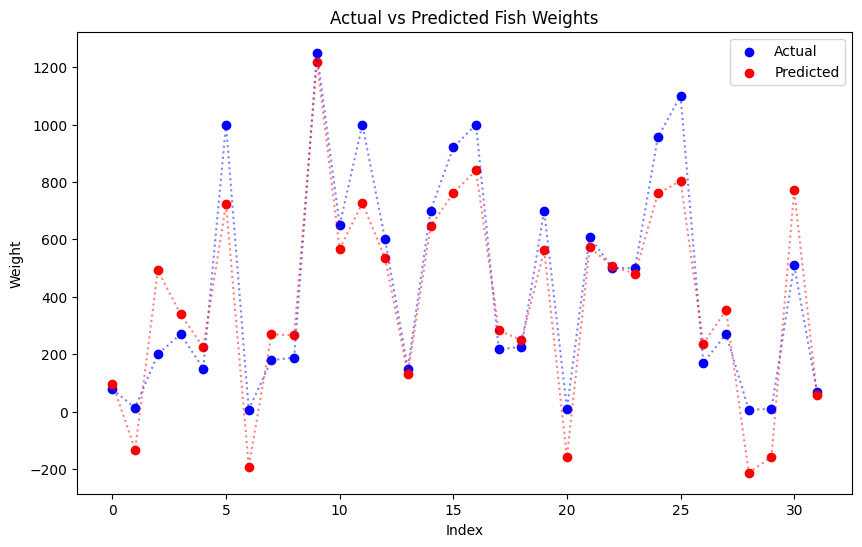

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values in blue and predicted values in red with connecting lines
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.plot(range(len(y_test)), y_test, color='blue', linestyle='dotted', alpha=0.5) # Line for actual values
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dotted', alpha=0.5) # Line for predicted values

plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Actual vs Predicted Fish Weights')
plt.legend()
plt.show()

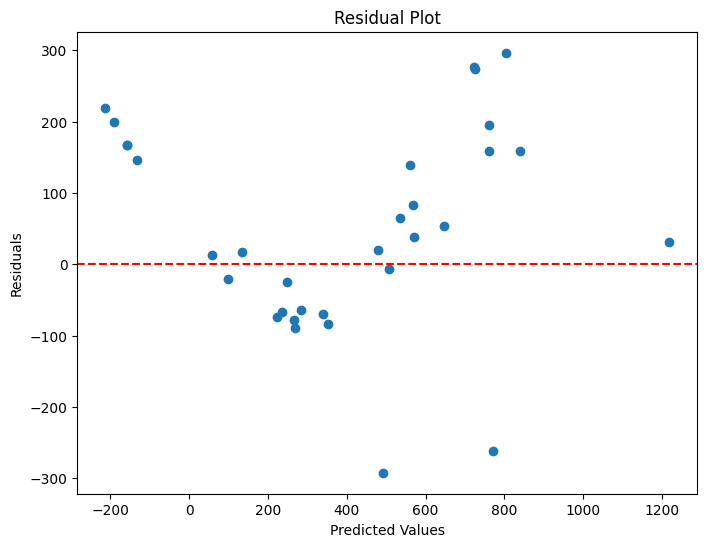

In [ ]:
# Residual plot to check errors distribution
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##What is a Residual Plot?
A residual plot is a type of graph used in regression analysis to evaluate how well a model fits the data. It shows the residuals (the differences between actual values and predicted values) on the vertical axis (y-axis) and the predicted values (or sometimes another variable, like actual values) on the horizontal axis (x-axis).

##What are Residuals?
Residuals are the "errors" in your model's predictions. They measure the difference between what your model predicted and what actually happened:

Residual
=
Actual Value
−
Predicted Value

------------------------------------------
For example:

* If a model predicts that a fish weighs 200 grams, but its actual weight is 210 grams, the residual is:

* Residual = 210−200 = +10



###Why Do We Use a Residual Plot?
We use a residual plot to check whether our regression model is working well and whether its assumptions are valid. Specifically, it helps us identify:

###Patterns in Errors:

* Ideally, residuals should be randomly scattered around zero. This means the model is capturing all patterns in the data and leaving only random noise as error.

* If there’s a clear pattern (e.g., a curve), it indicates that the model might not be appropriate for the data.



#Improve Model Performance

* Check for Non-Linearity:- visualize relationships between predictors and the target variable.

*  Feature Engineering:- Create interaction terms or polynomial features to capture complex relationships.

* Handle Multicollinearity:- Remove or combine highly correlated variables with Variance Inflation Factor (VIF)

##Address Outliers

In [ ]:
# Removing outliers using z-score
from scipy.stats import zscore

# Select only numerical features for z-score calculation
numerical_features = data.select_dtypes(include=np.number)

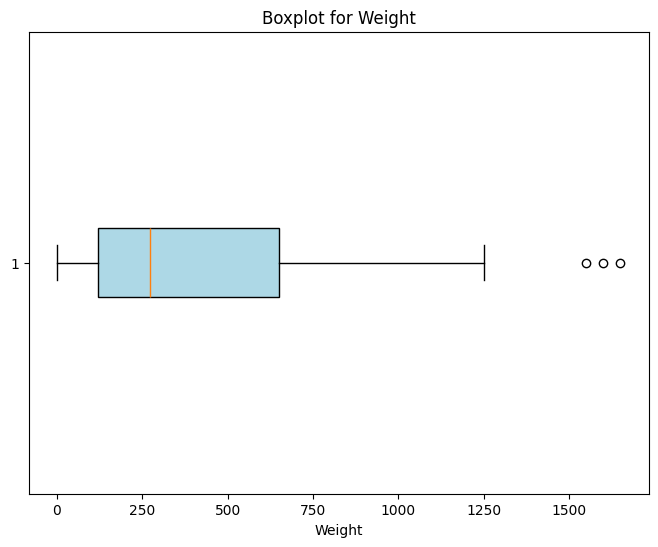

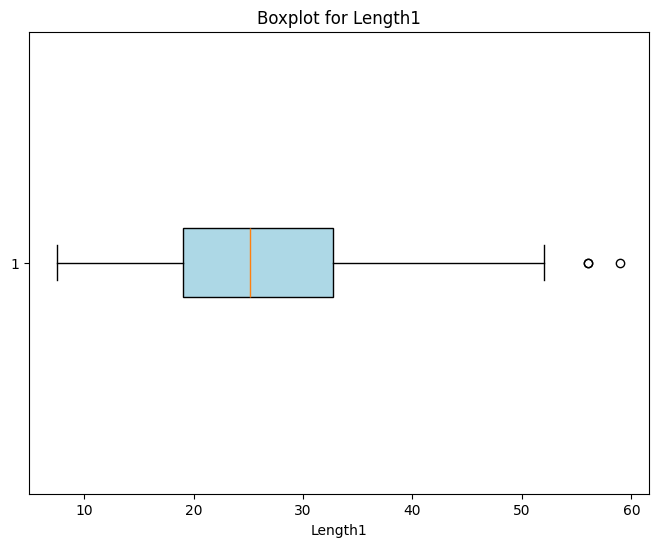

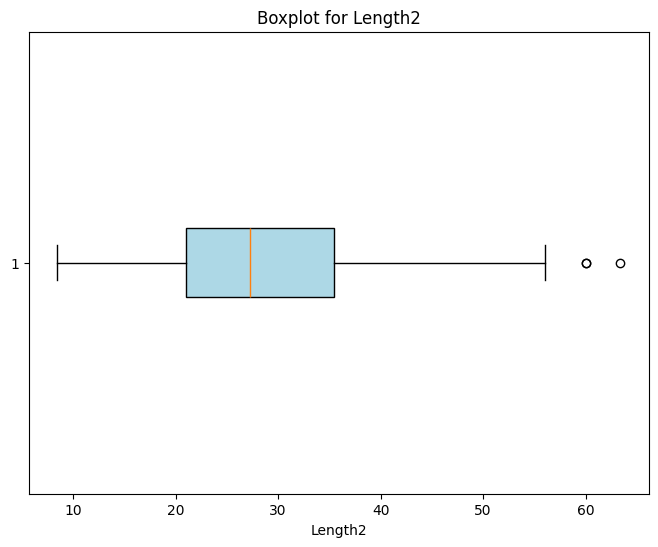

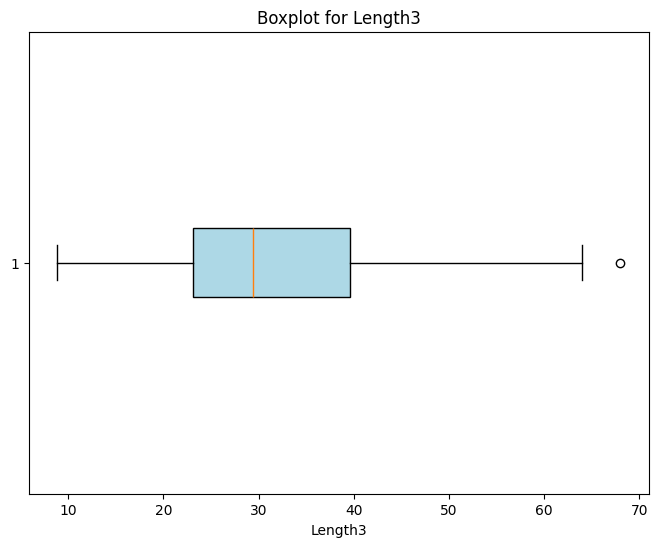

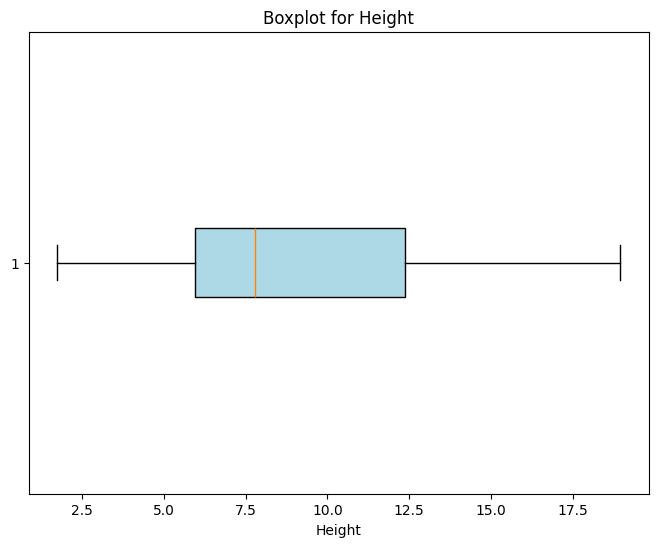

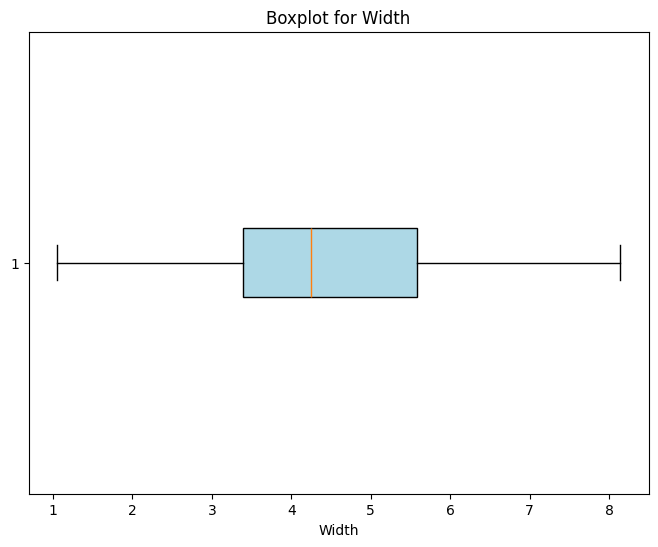

In [ ]:
# Generate boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[feature], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.show()

In [ ]:
z_scores = np.abs(zscore(numerical_features))
# Filter outliers based on z-scores for numerical features
data_cleaned = data[(z_scores < 3).all(axis=1)]

In [ ]:
# Log-transform the target variable (Weight) to reduce skewness

# Create a deep copy to avoid SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Replace zero or negative weights with a small constant (e.g., 0.1)
data_cleaned.loc[:, 'Weight'] = data_cleaned['Weight'].apply(lambda x: x if x > 0 else 0.1)

# Apply log transformation
data_cleaned.loc[:, 'Weight'] = np.log(data_cleaned['Weight'])

# Verify the transformation
print(data_cleaned['Weight'].head())

0    0.532236
1    0.551104
2    0.566924
3    0.573239
4    0.589083
Name: Weight, dtype: float64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (127, 9)
Testing set size: (32, 9)


## Regularization Techniques

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Lasso Regression with increased max_iter and adjusted alpha
lasso_model = Lasso(alpha=1.0, max_iter=5000)
lasso_model.fit(X_train_scaled, y_train)


Lasso(max_iter=5000)

In [ ]:
# Predict on test data
y_pred = lasso_model.predict(X_test_scaled)

# Cap predictions to avoid overflow in np.exp
y_pred_capped = np.clip(y_pred, a_min=None, a_max=100)  # Cap at 100

In [ ]:
# Step 5: Apply exponential transformation for capped predictions
y_pred_exp = np.exp(y_pred_capped)
y_test_exp = np.exp(np.clip(y_test, a_min=None, a_max=100))

In [ ]:
# Display first few predictions alongside actual values for comparison
comparison = pd.DataFrame({'Actual': y_test_exp.values, 'Predicted': y_pred_exp})
comparison.head()

,Actual,Predicted
0,7.498417e+33,3.000422e+33
1,6.600032e+05,2.420859e-13
2,2.688117e+43,2.688117e+43
3,2.688117e+43,2.688117e+43
4,2.688117e+43,2.688117e+43


In [ ]:
# Evaluate model performance on log-transformed scale
mse_log = mean_squared_error(y_test, y_pred)
r2_log = r2_score(y_test, y_pred)

print("Mean Squared Error (Log Scale):", mse_log)
print("R-squared Score (Log Scale):", r2_log)

Mean Squared Error (Log Scale): 19048.948420271496
R-squared Score (Log Scale): 0.866078150108816
